## Setup

In [6]:
import pandas as pd
import numpy as np
from glob import glob
import os
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from ast import literal_eval
from random import choice
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from tqdm import tqdm_notebook

In [2]:
# declare paths
in_root = "../../data/main/"
out_root = "../../data/output/xgbooster/"

In [3]:
df = pd.read_csv(os.path.join(in_root, "train_test.csv"))
df.sort_values(['id', 'date'], inplace=True)
df.set_index(['id'], inplace=True)
labels = df.loc[:, ~df.columns.str.startswith('target_')].drop(['date'], axis=1).columns

In [4]:
target_name = "NO2"

## Loading Params

In [8]:
# xgboost hyperparams
with open(os.path.join(out_root, "params/", "params_" + target_name + ".txt"), 'r') as f:
    params = literal_eval(f.read())

In [22]:
tune_params = {
    "learning_rate": [0.0010, 0.0015, 0.0020],
    "reg_alpha": [0.1, 0.2, 0.3, 0.5, 0.8],
}

## GridSearchCV Tuning

In [23]:
for _ in range(10):
    station_id = choice(df.index.unique().tolist())
    # select station for train_test
    df_id = df.loc[station_id, :].copy()
    df_id = df_id[~pd.isna(df_id['target_' + target_name])]
    X, y = df_id.loc[:, ~df.columns.str.startswith('target_')].drop(['date'], axis=1).values, df_id['target_' + target_name].values
    # split to train/test
    split = int(X.shape[0] * 0.20)
    X_train, y_train = X[split:], y[split:]
    X_test, y_test = X[:split], y[:split]
    # fit regression model
    m = GridSearchCV(XGBRegressor(**params), tune_params, verbose=1, n_jobs=-1, scoring="r2")
    m.fit(X_train, y_train)
    print(m.best_params_, "R2: ", m.best_score_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   16.7s finished


{'reg_alpha': 0.3, 'learning_rate': 0.002} R2:  -0.0548301113745
Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   18.1s finished


{'reg_alpha': 0.1, 'learning_rate': 0.002} R2:  0.382438206981
Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   14.9s finished


{'reg_alpha': 0.2, 'learning_rate': 0.002} R2:  0.475619546156
Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   14.2s finished


{'reg_alpha': 0.3, 'learning_rate': 0.0015} R2:  0.606077445162
Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   17.2s finished


{'reg_alpha': 0.1, 'learning_rate': 0.002} R2:  0.165573289599
Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   17.0s finished


{'reg_alpha': 0.5, 'learning_rate': 0.001} R2:  -81.8997927776
Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   18.2s finished


{'reg_alpha': 0.1, 'learning_rate': 0.0015} R2:  0.0676669675182
Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   18.2s finished


{'reg_alpha': 0.8, 'learning_rate': 0.0015} R2:  0.365743705149
Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   15.9s finished


{'reg_alpha': 0.1, 'learning_rate': 0.002} R2:  -0.000893337199073
Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   17.6s finished


{'reg_alpha': 0.5, 'learning_rate': 0.002} R2:  0.562321770691


## Examine Dataset and Feature Importances

In [9]:
# df_id.describe().T

In [10]:
# m = XGBRegressor(**params)
# m.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0.01, learning_rate=0.001,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=3000, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0.1, reg_lambda=0.9, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.7)

In [11]:
# r2_score(y_train, m.predict(X_train))

0.81298773526107515

In [12]:
# r2_score(y_test, m.predict(X_test))

0.75156940832143326

In [ ]:
# plt.figure(figsize=(10, 10))
# plt.barh(range(len(m.feature_importances_)), m.feature_importances_,
#          tick_label=labels)
# plt.show()

In [25]:
r2 = []
for _ in tqdm_notebook(range(30)):
    station_id = choice(df.index.unique().tolist())
    # select station for train_test
    df_id = df.loc[station_id, :].copy()
    df_id = df_id[~pd.isna(df_id['target_' + target_name])]
    X, y = df_id.loc[:, ~df.columns.str.startswith('target_')].drop(['date'], axis=1).values, df_id['target_' + target_name].values
    # split to train/test
    split = int(X.shape[0] * 0.20)
    X_train, y_train = X[split:], y[split:]
    X_test, y_test = X[:split], y[:split]
    # fit regression model
    m = XGBRegressor(**params)
    m.fit(X_train, y_train)
    r2.append(r2_score(y_test, m.predict(X_test)))

HBox(children=(IntProgress(value=0, max=30), HTML(value='')))

24


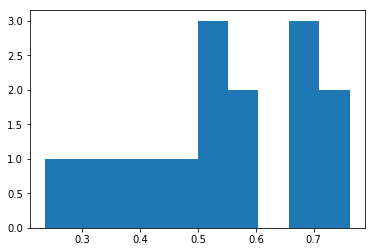

In [26]:
r2 = np.array(r2)
print(np.sum(r2 > 0))
r2 = r2[r2 > np.median(r2)]
plt.hist(r2)
plt.show()

## CV versus Test R2

In [13]:
kf = KFold(n_splits=10, shuffle=False, random_state=0)
for _ in range(3):
    station_id = choice(df.index.unique().tolist())
    cv_r2 = []
    # select station for train_test
    df_id = df.loc[station_id, :].copy()
    df_id = df_id[~pd.isna(df_id['target_' + target_name])]
    X, y = df_id.loc[:, ~df.columns.str.startswith('target_')].drop(['date'], axis=1).values, df_id['target_' + target_name].values
    # split to train/test
    split = int(X.shape[0] * 0.20)
    X_train, y_train = X[split:], y[split:]
    X_test, y_test = X[:split], y[:split]
    # fit regression model
    m = XGBRegressor(**params)
    for train_index, val_index in kf.split(X_train):
        # train-test split
        X_fit, X_val = X_train[train_index], X_train[val_index]
        y_fit, y_val = y_train[train_index], y_train[val_index]  
        # fit regression model
        m.fit(X_fit, y_fit)
        cv_r2.append(r2_score(y_val, m.predict(X_val)))
    print("CV R2: ", cv_r2)
    m.fit(X_train, y_train)
    print("Test R2: ", r2_score(y_test, m.predict(X_test)))

CV R2:  [-1.0172389823109227, -0.19783932932395532, -0.049484964325658298, 0.025646143035222169, 0.2837890519871461, -0.035373620511054416, -0.92150007982396143, -0.044339908361276992, 0.42695628493165338, 0.19158908398875385]
Test R2:  -3.07805382639
CV R2:  [0.066085931030028133, 0.018410326158754486, 0.17879463997003964, -0.74979689489452994, 0.3841704581454275, 0.12011551709747881, -2.8469376428710782, 0.61916901271274494, -1.7494523155072366, -0.16324072696631053]
Test R2:  -0.603195340267
CV R2:  [0.32340449831029794, 0.20367092366644157, -0.29848926656926023, -1.9304575271611499, 0.1572854688646369, 0.39188382044974601, 0.1145488546354787, 0.10988950372775186, 0.10972855542671633, -0.95948341356975342]
Test R2:  0.0677594334324
